## Практикум "Исследование данных о российском кинопрокате"



### Описание проекта:
* Заказчик этого исследования — Министерство культуры Российской Федерации.
* Необходимо изучить рынок российского кинопроката и выявить текущие тренды. 
* Уделить внимание фильмам, которые получили государственную поддержку. 
* Ответить на вопрос, насколько такие фильмы интересны зрителю.
* Даннымие, используемые в работе - опубликованны на портале открытых данных Министерства культуры. 


### Описание данных:
##### Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

##### Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

##### Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

##### Также подключим необходимые библиотеки

In [2]:
import pandas as pd
from numpy import round
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

##### Импортируем данные, а также просмотрим основную информацию

In [3]:
df1=pd.read_csv('mkrf_movies.csv')

df2=pd.read_csv('mkrf_shows.csv')

display(df1.info(),df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

None

##### Заметим, что в соеденительном столбце `puNumber` - разные типы данных, исправим это:
* есть строки что не содержат значений поэтому используем метод coerce,
* удалим некорректные значения столбца, появившиеся после предыдущей операции,
* переводим тип значений столбца в int.

In [4]:
df1['puNumber']=pd.to_numeric(df1['puNumber'],errors='coerce')

df1=df1.dropna(subset='puNumber')

df1['puNumber']=df1['puNumber'].astype('int')

##### Теперь осталось соеденить данные так чтобы остались данные из большого датасета (поэтому используем left join) 

In [5]:
df=pd.merge(df1,df2,on='puNumber',how='left')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

None

##### Данные собраны в единый датасет `df` можно переходить к следующему этапу работы.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

##### Проверим типы данных в датафрейме и преобразуем их:
* в столбце show_start_date тип изменим на date,
* в столбце rating тип изменим на float

In [57]:
df['show_start_date']=pd.to_datetime(df['show_start_date'])

##### Проверим как выглядит столбец рейтинга:

In [7]:
display(df['ratings'].unique())

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

##### Видно, что в стобце данные в разных форматах, исправим это: 
* Рейтинг может принимать значения от 0 до 10. 
* Отсутствующие значения заменим на 0: это не повлияет на полное представление данных, а значение 0 будет индикатором о, например, ещё не выставленном рейтинге фильма.

In [8]:
df['ratings']=pd.to_numeric(df['ratings'],errors='coerce')
df['ratings']=df['ratings'].fillna(0)
display(df['ratings'].unique())

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

##### Теперь в датасете во всех стобцах корректные типы данных; можно приступать к следующему этапу.

#### Шаг 2.2. Изучим пропуски в датафрейме

##### Оценим кол-во пропущенных значений в каждом стобце

In [9]:
propusk=(df.isna().sum())
asd=pd.DataFrame(propusk)
asd.columns=['Кол-во пропусков']
asd['Процент пропусков']=asd['Кол-во пропусков']/len(df['title'])*100
print(asd)

                       Кол-во пропусков  Процент пропусков
title                                 0               0.00
puNumber                              0               0.00
show_start_date                       0               0.00
type                                  0               0.00
film_studio                          18               0.24
production_country                    2               0.03
director                              9               0.12
producer                            568               7.59
age_restriction                       0               0.00
refundable_support                 7153              95.56
nonrefundable_support              7153              95.56
budget                             7153              95.56
financing_source                   7153              95.56
ratings                               0               0.00
genres                              975              13.03
box_office                         4327              57.

##### Попробуем заполнить пропуски адекватными значениями, если не выйдет изменим по следующим правилам:
* film_studio - Без студии
* production_country - Без страны
* director - Без директора
* producer - Без продюсера
* refundable_support - 0
* nonrefundable_support - 0
* budget - 0
* financing_source - Коммерция
* genres - Без жанра
* box_office - 0

##### Проверим столбец film_studio:

In [10]:
display(df[df['film_studio'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,41225.00
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN


##### Определить данные о студии по другим столбцам не представляется возможным: заменим пропуски на "Без студии"

In [11]:
df['film_studio']=df['film_studio'].fillna('Без студии')

##### Проверим столбец production_country

In [12]:
display(df[df['production_country'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Без студии,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


##### Точно определить данные о студии по другим столбцам не представляется возможным: заменим пропуски на "Без страны" (понятно что это российские фильмы, но работая лишь с датасетом этого нельзя достоверно определить)

In [13]:
df.loc[df['production_country'].isna(),'production_country']='Без страны'

##### Проверим столбецы director и producer:

In [14]:
display(df[df['director'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Без студии,Без страны,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


##### Будем считать, что если у фильма указан продюсер, но отсутствует директор, то директор и есть продюсер; если же не указан и продюмер и директор, то в director занесём 'Без директора'
##### Если у фильма указан директор, но отсутствует продюсер, то продюмером является директор. Если же не указан ни продюсер ни директор, то в producer занесём 'Без продюсера'

In [15]:
df.loc[(df['director'].isna())&(df['producer'].isna()==False),'director']=df.loc[(df['director'].isna())&(df['producer'].isna()==False),'producer']

df.loc[(df['producer'].isna())&(df['director'].isna()==False),'producer']=df.loc[(df['producer'].isna())&(df['director'].isna()==False),'producer']

df['producer']=df['producer'].fillna('Без продюсера')

df['director']=df['director'].fillna('Без директора')

##### Пропуски в столбцах refundable_support и nonrefundable_support заменим на 0, ведь, вероятно всего, фильмы у которых есть пропуски в этих полях не имеют гос. поддержки.

In [16]:
df['refundable_support']=df['refundable_support'].fillna(value=0)
df['nonrefundable_support']=df['nonrefundable_support'].fillna(value=0)

##### Пропуски в столбце budget заполним значениeми суммы полей refundable_support и nonrefundable_support 

In [ ]:
df['budget']=df['budget'].fillna(value=df['refundable_support']+df['nonrefundable_support'])

##### Если в поле financing_source не указан тип финансирования, то, вероятно, фильм - частный/коммерческий проект. Заполним пропуски в этом столбце на "Коммерческий"

In [18]:
df['financing_source']=df['financing_source'].fillna(value='Коммерческий')

##### Пропуски в genres заменим на "Без жанра"

In [19]:
df['genres']=df['genres'].fillna(value='Без жанра')

##### Просмотрим в каких строках встречается пропуски в box_office

In [20]:
display(df[df['box_office'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Без продюсера,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Коммерческий,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.00,0.00,0.00,Коммерческий,0.00,Без жанра,NaN
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.40,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Коммерческий,0.00,Без жанра,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Коммерческий,0.00,Без жанра,NaN


##### Не откуда взять информацию о сборах; заполним пропуски 0

In [21]:
df['box_office']=df['box_office'].fillna(value=0)

##### Закончили заполнение пропусков, оценим кол-во уникальных значений столбов:

In [22]:
display(df.nunique()/len(df)*100)

title                   90.46
puNumber                99.97
show_start_date         26.24
type                     0.11
film_studio             73.36
production_country      12.71
director                64.36
producer                71.48
age_restriction          0.07
refundable_support       0.45
nonrefundable_support    1.00
budget                   3.87
financing_source         0.05
ratings                  1.08
genres                   9.93
box_office              39.25
dtype: float64

#### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты и опишем причины, которые могли повлиять на появление дублей.

##### Проверим есть ли полные дубликаты

In [23]:
display(df[df.duplicated()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


##### Полных дубликатов не оказалось

##### Проверим есть ли дубликаты по полям title, show_start_date, type, film_studio, production_country, director

In [24]:
display(df[df.duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director'], keep=False)])

display(len(df[df.duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director'], keep=False)]))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,Эпидемия_,121025713,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.20,"драма,фантастика,триллер",0.00
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.20,"драма,фантастика,триллер",0.00
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,3.50,"комедия,приключения",0.00
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,3.50,"комедия,приключения",0.00
2190,Последние пять лет.,221008115,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,"мюзикл,драма,мелодрама",0.00
2191,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,"мюзикл,драма,мелодрама",52495.00
2751,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Коммерческий,5.20,"мультфильм,семейный,спорт",1360.00
2752,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Коммерческий,5.20,"мультфильм,семейный,спорт",14152495.90
3085,Анархисты,221003916,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,драма,0.00
3086,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,драма,332371.00


16

##### Всего таких фильмов 16, это одни и те же фильмы, у которых отличаются лишь прокатные номера. Вероятно у фильмов были разные прокатные цели. Отсавим как есть

##### Рассмотрим фильмы что имеют одинаковые puNumber (прокатные удостоверения). Вероятно фильмам по ошибке выдали одинаковые прокатные удостоверения.

In [25]:
display(df[df['puNumber'].duplicated(keep=False)])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.00,"мелодрама,комедия",0.00
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.60,"драма,мелодрама,история",0.00
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.40,"комедия,криминал",0.00
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Коммерческий,6.80,"комедия,криминал",0.00


##### Всего таких фильмов 4 штуки

##### Изменим прокатные удостоверения фильмам 'Анализируй это!' и 'Анализируй то!' (на исследование это не повлияет т.к. puNumber будет использоваться только в качестве идентификатора). При этом выберем фильм что встречается только один раз и выдадис ему номер 12345678 (предварительно проверив что он уникальный)

In [26]:
'''display(df[df['title']=='Анализируй это!'])
display(df[df['title']=='Анализируй то!'])
display(df[df['puNumber']==12345678])'''

df.loc[df['title']=='Анализируй то!','puNumber']=12345678

##### Теперь аналогично исправим puNumber 221154310:

In [27]:
'''display(df[df['title'].str.contains('Иоанна - женщина на папском')])
display(df[df['title']=='Как жениться и остаться холостым'])
display(df[df['puNumber']==12345679])'''

df.loc[(df['puNumber']==221154310)&(df['title']=='Как жениться и остаться холостым'),'puNumber']=12345679

#### Причины появления повторяющихся значений:
1. Разные прокатные цели у одних и тех же фильмов
2. Ошибки при формировании прокатных удостоверений

#### Шаг 2.4. Изучим столбцы, которые содержат категориальные значения:
- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
 - Исправим проблемные значения в поле type.

##### Всего в датасете 4 категориальных столбца:
* type
* age_restriction
* financing_source
* genres

##### Проверим типы фильмов:

In [28]:
display(df['type'].unique())

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

##### В типе данных встречаются одинаковые названия с разницей в пробел - исправим это:

In [29]:
df['type']=df['type'].str.strip()

display(df['type'].unique())

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

##### Проверим age_restriction (тип возрастной категории фильма)

In [30]:
display(df['age_restriction'].unique())

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

##### В типе данных нет одинаковых строк что следовало бы исправить.

##### Проверим financing_source (тип финансирования):

In [31]:
display(df['financing_source'].unique())

array(['Коммерческий', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

##### В предыдущих щагах мы уже исправили непроименнованные строки. Тут нет строк что следуовало бы исправить.

##### Проверим genres (жанры фильма):

In [32]:
display(len(df['genres'].unique()))
display((df['genres'].unique())[:10])

743

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт'], dtype=object)

##### Как можно заметить в качестве жанра в датасете принемается комбинация нескольких жанров (например жанр 'боевик,триллер,детектив'), это объясняет вариативность этого столбца (743 уникальных значения). 
##### На всякий случая удалим пробелы что могут быть в данных и выделим основной жанр (допустим главный жанр указан первым)

In [33]:
df['genres']=df['genres'].str.strip()
display(len(df['genres'].unique()))

743

##### Напишем отдельную функцию для выделения основного жанра:

In [34]:
def main_genres(x):
    strr =str(x)
    itog=''
    for i in strr:
        if i!=',':
            itog+=i
        else:
            break
    return itog

##### Выделим основной жанр в столбец main_genres и после определим кол-во уникальных значений главного жанра

In [35]:
df['main_genres']=df['genres'].apply(lambda x: main_genres(x))
display(df['main_genres'].unique())
display(df['main_genres'].describe())

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'Без жанра', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

count      7485
unique       29
top       драма
freq       1688
Name: main_genres, dtype: object

##### Получилось 29 уникальных жанров (вместо изначальных 741)

#### Общий вывод. Категориальные значения:
В некоторых категориальных столбцах содержались несовершенства, например в type и financing_sourse (пришлось избавляться от лишних пробелов и зполнять пропущенные данные). Был создан новый столбец, содержащий информацию о главном жанре фильма main_genres. Столбец age_restriction изначально содержал корректные значения.

#### Шаг 2.5. Изучим столбцы, которые хранят количественные значения. 
* Проверим, обнаружились ли в таких столбцах подозрительные данные. 
* Опредио как с такими данными лучше поступить.

##### Анализировать будем следующие количественные стобцы:
* budget
* refundable_support
* nonrefundable_support
* box_office

##### Проверим логику заполнения столбцов:

In [36]:
display(len(df[(df['financing_source']!='Коммерческий')&(df['budget']!=0)]))

display((df['budget']!=0).sum())

display(len(df[(df['financing_source']!='Коммерческий')&((df['refundable_support']!=0)|(df['nonrefundable_support']!=0))]))

display(len(df[(df['nonrefundable_support']!=0)|(df['refundable_support']!=0)]))

display(len(df[((df['budget']!=0)|(df['refundable_support']!=0)|(df['nonrefundable_support']!=0))&(df['box_office']!=0)]))

315

np.int64(315)

332

332

318

##### Получается данные о бюджете, объеме возвратных и невозвратных денег известны только о некоммерческих (государственных фильмах). К тому же почти во всех фильмах государственных фильмах указаны кассовые сборы, проверим государственные фильмы что имеют кассовые сборы 0:

In [37]:
display(df[(df['budget']!=0)&(df['refundable_support']!=0)&(df['nonrefundable_support']!=0)&(df['box_office']==0)])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",0.00,фантастика
7477,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.00,60000000.00,150147502.00,Фонд кино,4.50,"комедия,фантастика,мелодрама",0.00,комедия


##### Имеем 2 фильма, имеющие гос. поддержку и нулевые сборы. Проверим даты выхода фильмов в датасете:

In [58]:
display(df['show_start_date'].max())

display(df.iloc[(7473,2)])
display(df.iloc[(7477,2)])

Timestamp('2019-12-30 12:00:00+0000', tz='UTC')

Timestamp('2019-12-23 12:00:00+0000', tz='UTC')

Timestamp('2019-12-24 12:00:00+0000', tz='UTC')

##### Видно, что фильмы с 0 сборами имеют дату выхода близкую к последней в датасете. Вероятно фильмы вышли незадолго до формирования датасета и поэтому информации об их сборах еще не было (возможно фильмы даже еще показывали в кинотеатрах).

##### Проверим "адекватность" бюджета фильмов (он должен быть больше или равен сумме возвратных и невозвратных средств) и выведим фильмы с "неадекватным" бюджетом:

In [39]:
display(len(df[df['budget']<df['refundable_support']+df['nonrefundable_support']]))

display((df[df['budget']<df['refundable_support']+df['nonrefundable_support']]))

napom=((df[df['budget']<df['refundable_support']+df['nonrefundable_support']].index))


17

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,мелодрама
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00,драма
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,боевик
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80,комедия
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,мультфильм
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51,комедия
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20,комедия
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43,комедия
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00,комедия
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00,фантастика


##### Таких фильмов - 17 и у всех них бюджет = 0.
Попробуем воостановить их бюджет из размера гос. поддержки: предположим что доля гос. поддержки одинакова для всех фильмов и расчитаем бюжет для этих фильмов.

In [40]:
good_buget=((df[df['budget']>df['refundable_support']+df['nonrefundable_support']]))
good_buget['procent_support']=(good_buget['refundable_support']+good_buget['nonrefundable_support'])/good_buget['budget']

median_procent_support=(round(good_buget['procent_support'].median()*100,2))


/var/folders/5h/4f18v2q96gv2lm0t_b6g7klc0000gn/T/ipykernel_42946/4013728719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_buget['procent_support']=(good_buget['refundable_support']+good_buget['nonrefundable_support'])/good_buget['budget']


##### Чаще всего процент гос. поддержки = 59.23%, теперь заполним те проблемные 17 фильмов:

In [41]:
df.loc[df['budget']<df['nonrefundable_support']+df['refundable_support'],'budget']=(df['nonrefundable_support']+df['refundable_support'])/median_procent_support*100

display(df.iloc[napom])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,38831673.14,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,мелодрама
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,126625021.10,Фонд кино,6.60,драма,446163511.00,драма
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,135066689.18,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,боевик
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,33766672.29,Фонд кино,6.20,"комедия,фэнтези",67418974.80,комедия
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,270133378.36,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,мультфильм
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,99611683.27,Фонд кино,6.30,"комедия,драма",1957738.51,комедия
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,59091676.52,Фонд кино,5.10,"комедия,мелодрама",72937783.20,комедия
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,10130001.69,Министерство культуры,4.30,комедия,15362931.43,комедия
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,118183353.03,Фонд кино,6.30,"комедия,мелодрама",70299052.00,комедия
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,422083403.68,Фонд кино,5.60,фантастика,1038321489.00,фантастика


##### Успешно заполнили сборы для фильмов с гос. поддержкой.

#### Шаг 2.6. Добавим новые столбцы

##### Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.


In [42]:
df['year']=(df['show_start_date'].dt.year)

##### Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Столбец с главным жанром мы выделили до этого при анализе категориальных столбцов, для создания столбца с главным режиссером используем ту же функцию main_genres:

In [43]:
df['main_director']=df['director'].apply(lambda x: main_genres(x)) 
display(df['main_director'].unique(),df['main_director'].nunique())   
display(df['main_genres'].unique(),df['main_genres'].nunique())

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

4618

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'Без жанра', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

29

##### Опредилим, какую долю от общего бюджета фильма составляет государственная поддержка.

##### Мы уже считали медианную долю гос. поддержки в фильмах где она была, она составила 59.23%. Добавим столбец содержащий информацию о доле гос. поддержки для каждого фильма (где поддержка не осуществлялась оставим значение 0):

In [44]:
df['gov_support']=(df['nonrefundable_support']+df['refundable_support'])/df['budget']*100
df['gov_support']=df['gov_support'].fillna(0)

### Шаг 3. Проведем исследовательский анализ данных

##### Посмотрите, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

,Вышло в прокат,Вышло за год,Процент проката
year,,,
2010,101,985,10.25
2011,109,622,17.52
2012,123,593,20.74
2013,179,630,28.41
2014,273,806,33.87
2015,462,705,65.53
2016,525,818,64.18
2017,357,505,70.69
2018,475,891,53.31


Процент фильмов с указанной информацией о прокате: 41.87


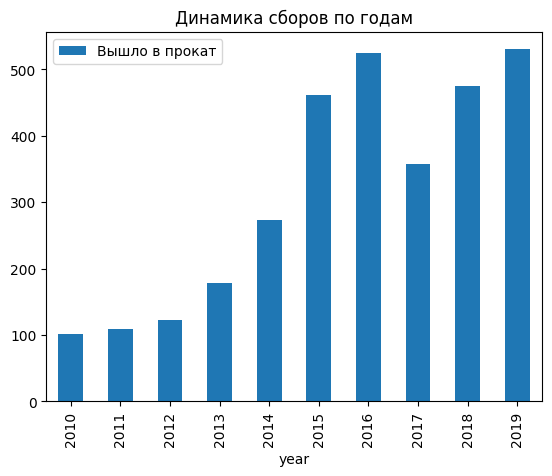

In [45]:
df_pivot=(df[df['box_office']>0].pivot_table(values='box_office',index='year',aggfunc='count'))
df_pivot.columns=['Вышло в прокат']

df_pivot['Вышло за год']=(df.pivot_table(values='box_office',index='year',aggfunc='count'))

df_pivot['Процент проката']=df_pivot['Вышло в прокат']/df_pivot['Вышло за год']*100
display(df_pivot)

print("Процент фильмов с указанной информацией о прокате:",round(len(df[df['box_office']>0])/len(df)*100,2))

df_pivot.plot(y='Вышло в прокат',use_index=True,kind='bar')
plt.title("Динамика сборов по годам")
plt.show()



##### За период 2010 - 2019 заметен рос фильмов что вышли в прокат, их доля увеличилась в 5 раз. Однако в 2017 году произошел спад, но к 2019 году значения вернулись в норму (2016 год). Объяснить это множно, например, изменинием в системе финансирования кинопроектов в РФ (это привело к увеличению стоимости кинопроизводства), а также популяризацией таких сервисов как Netflix. Это только предположение и сказать точно, что вызвало спад в кинопроизводстве в 2017 году в рамках этого проекта не представляется возможным.

#### Проверим есть ли различия между РФ и остальными странами:

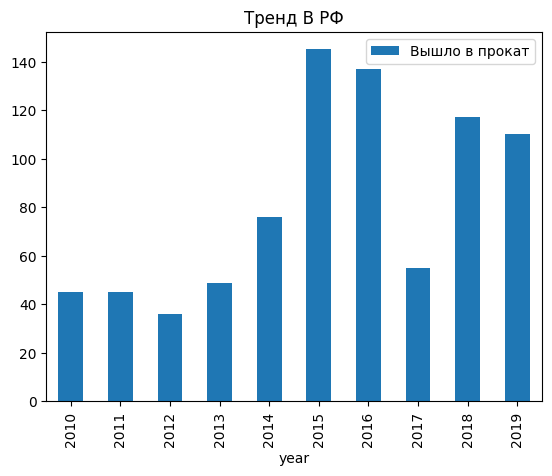

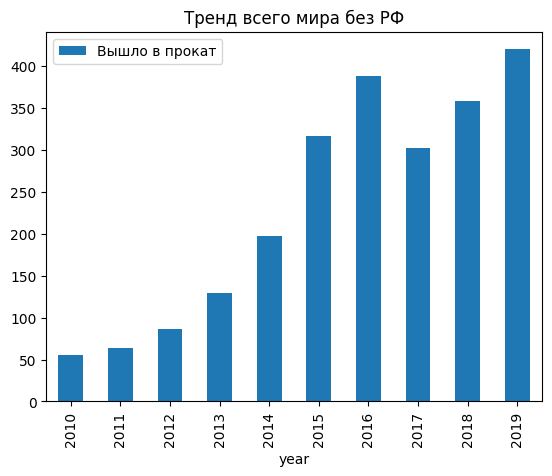

In [46]:
#display(df['production_country'].unique())

def country_sep(x):
    s=''
    for i in x: 
        if i==',' or i=='-':
            break
        else:
            s+=i
    return s.strip()

df['main_country']=df['production_country'].apply(lambda x: country_sep(x))
#display(df['main_country'].unique())

df_pivot_russia=(df[(df['box_office']>0)&(df['main_country']=='Россия')].pivot_table(values='box_office',index='year',aggfunc='count'))
df_pivot_russia.columns=['Вышло в прокат']
df_pivot_russia.plot(y='Вышло в прокат',use_index=True,kind='bar')
plt.title("Тренд В РФ")
plt.show()

df_pivot_not_russia=(df[(df['box_office']>0)&(df['main_country']!='Россия')].pivot_table(values='box_office',index='year',aggfunc='count'))
df_pivot_not_russia.columns=['Вышло в прокат']
df_pivot_not_russia.plot(y='Вышло в прокат',use_index=True,kind='bar')
plt.title('Тренд всего мира без РФ')
plt.show()


В целом и в РФ и во всем мире в 2016 был спад, однако в РФ спад был более стремительным. 

##### Изучим, как менялась динамика проката по годам. Определим в каком году сумма сборов была минимальной, а максимальной.

,box_office
year,
2010,2428654.00
2011,14102765.00
2012,6955423.00
2013,29799706.20
2014,7444951859.20
2015,39497365196.40
2016,47866299741.91
2017,48563707217.51
2018,49668403134.32


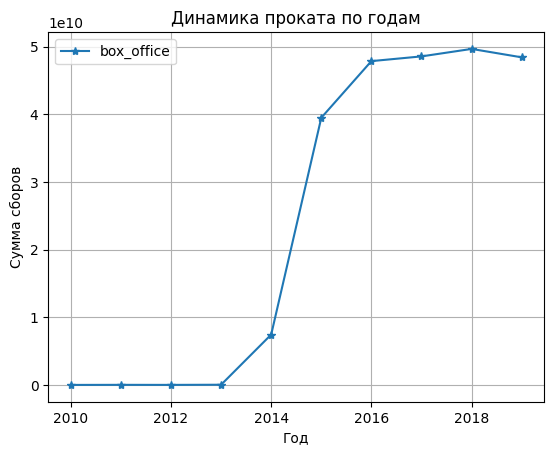

Минимальная сумма сборов была в  box_office    2010
dtype: int32
Максимальная сумма сборов была в  box_office    2018
dtype: int32


In [47]:
box_pivot=df[df['box_office']>0].pivot_table(values='box_office',index='year',aggfunc='sum')
display(box_pivot)

box_pivot.plot(grid=True,marker='*')
plt.title('Динамика проката по годам')
plt.xlabel('Год')
plt.ylabel("Сумма сборов")
plt.show()

print("Минимальная сумма сборов была в ",box_pivot.idxmin())

print("Максимальная сумма сборов была в ",box_pivot.idxmax())


Заметна корреляция между кол-вом выпускаемого кино и суммой сборов, другими словами: чем больше кинолент выходило в прокат в году, тем больше были сборы в году.
Максимальные сборы были в 2018
Минимальные сборы были в 2010

##### C помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

,mean,median
year,,
2010,24046.08,1710.00
2011,129383.17,3000.00
2012,56548.15,6220.00
2013,166478.81,3580.00
2014,27270885.93,20400.00
2015,85492132.46,5003450.15
2016,91173904.27,3915041.02
2017,136032793.33,9968340.00
2018,104565059.23,8891102.21


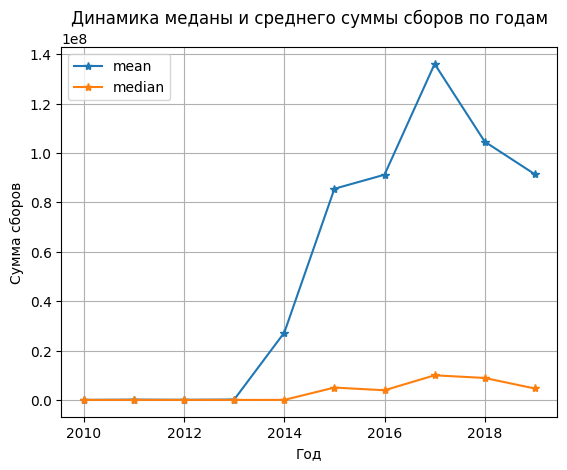

In [48]:
param_pivot=df[df['box_office']>0].pivot_table(values='box_office',index='year',aggfunc={'median','mean'})
display(param_pivot)

param_pivot.plot(grid=True,marker='*')
plt.title('Динамика меданы и среднего суммы сборов по годам')
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.show()

Динамика среднего аналогична динамике сборов по годам. Динамика медианы же осталась примерно на одном уровне: объяснить это можно тем что были фильмы с действительно большими сборами (что и повлияло на суммарные сборы), но их кол-во было не велико

##### Определим:
* Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?
* Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? 
* Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2010,1887611.00,120146.00,366512.00,54385.00,NaN
2011,13499871.00,219891.00,381513.00,1040.00,450.00
2012,2266483.00,108734.00,3254216.00,182580.00,1143410.00
2013,2710302.50,20910336.50,658069.60,5161245.60,359752.00
2014,375562258.20,2584782324.00,544280086.70,2209712746.90,1730614443.40
2015,379054578.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41


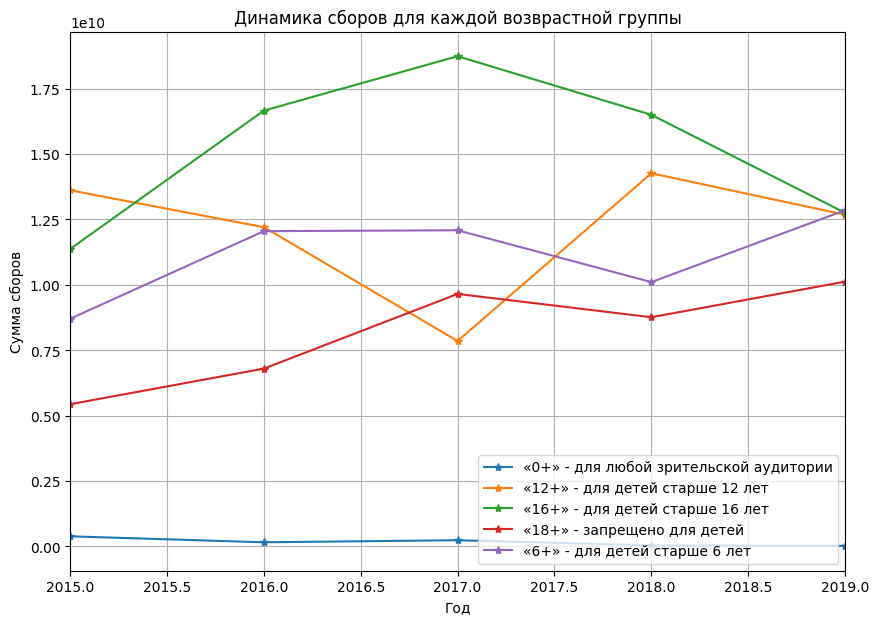

'Сумма сборов за все года по каждой из возрастных групп:'

age_restriction
«0+» - для любой зрительской аудитории    1205003951.67
«12+» - для детей старше 12 лет          63225588059.83
«16+» - для детей старше 16 лет          76583674040.93
«18+» - запрещено для детей              42974727569.62
«6+» - для детей старше 6 лет            57530728855.08
dtype: float64

Минимальные сборы для категории  «0+» - для любой зрительской аудитории  составили  1205003951.6699996
Максимальные сборы для категории  «16+» - для детей старше 16 лет  составили  76583674040.93001


In [49]:
ages_pivot=df[df['box_office']>0].pivot_table(index='year',values='box_office',columns='age_restriction',aggfunc='sum')
display(ages_pivot)

ages_pivot.plot(figsize=(10,7),grid=True,marker='*')
plt.xlim(2015,2019)
plt.legend(loc='lower right')
plt.xlabel('Год')
plt.title('Динамика сборов для каждой возврастной группы')
plt.ylabel('Сумма сборов')
plt.show()

display("Сумма сборов за все года по каждой из возрастных групп:",ages_pivot.sum())

print("Минимальные сборы для категории ",ages_pivot.sum().idxmin()," составили ",ages_pivot.sum().min())

print("Максимальные сборы для категории ",ages_pivot.sum().idxmax()," составили ",ages_pivot.sum().max())

##### Возрастное ограничение влияет на сборы фильма в период 2015-2019: фильмы, имеющие категорию 0+, на протяжении всего периода имели одинаковые низкие сборы; фильмы с ограничением 16+ лидировали по сборам 3 года подряд (в 2019 уступили 6+) (это может быть объяснено например взрослением аудитории за 3 года аудитория 16+ выросла и теперь не интересуется подобными фильмами; одна из возможных причин популяризация в то время стриминговых сервисов типа netflix, в особенности такие сервисы были популярные среди аудитории 16+).
##### За все время больше всего собрали фильмы с категорией «16+» - для детей старше 16 лет (76583674040.93).


#### Общий вывод исследовательский анализ данных
Анализ данных 2010-2019 годов подтверждает общий рост и развитие киноиндустрии, выраженный в увеличении объёмов производства и бюджетирования. Однако в 2017 году был зафиксирован резкий спад в числе фильмов, допущенных до проката. Несмотря на то, что долгое время лидерами по кассовым сборам были картины с маркировкой «16+», после 2017 года их популярность начала снижаться, предположительно из-за высокой конкуренции с фильмами категории «12+» и перенасыщения рынка. Знаковым трендом стал выход на первое место в 2019 году фильмов для аудитории «6+», что указывает на эволюцию зрительских предпочтений. 
Этот сдвиг может объясняться взорслением аудитории, измениением конъюктуры кинорынка (в пользу стриминга), а также возрастающим влиянием качества сценария и эффективности рекламных кампаний на выбор аудитории.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку
* поищим интересные закономерности в данных. 
* посмотрим, сколько выделяют средств на поддержку кино. 
* проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [50]:
print('Всего фильмов с гос. поддержкой:',len(df[(df['financing_source']!='Коммерческий')]))
print('Среди них с учтенными сборами:',len(df[(df['financing_source']!='Коммерческий')&(df['box_office']>0)]))
print('Среди них с неучтенными сборами:',len(df[(df['financing_source']!='Коммерческий')&(df['box_office']==0)]))

# Либо совсем новые фильмы что были в прокате на момент формирования сета либо фильмы не прокатываемые в кино
#display(df[(df['financing_source']!='Коммерческий')&(df['box_office']==0)])

svodnaya_gov_sup=(df.loc[(df['financing_source']!='Коммерческий')&(df['box_office']>0),['budget','gov_support','box_office','main_genres','ratings']])
svodnaya_gov_sup['gov_money']=svodnaya_gov_sup['budget']*svodnaya_gov_sup['gov_support']/100

print('Медиана по выделяемой гос. поддержке на фильм:',svodnaya_gov_sup['gov_money'].median())

print('Медиана по общему бюджету фильмов с гос. поддержкой:',svodnaya_gov_sup['budget'].median())

print('Медиана по сборам фильмов с гос. поддержкой:',svodnaya_gov_sup['box_office'].median())

Всего фильмов с гос. поддержкой: 332
Среди них с учтенными сборами: 318
Среди них с неучтенными сборами: 14
Медиана по выделяемой гос. поддержке на фильм: 35000000.0
Медиана по общему бюджету фильмов с гос. поддержкой: 76956529.0
Медиана по сборам фильмов с гос. поддержкой: 15720067.715


##### В данных есть фильмы с неучтенными сборами (таких 14 из 332): это могут быть либо совсем новые фильмы, что были в прокате на момент формирования сета, либо фильмы не прокатываемые в кино. Далее при анализе фильмов с гос. поддержкой они не учитывались. 
##### Уже можно заметить разницу в медианных значениях поддержки и сборов 35000000.0 (медианная гос. помощь) и 15720067.715 (медианные сборы). Посмотрим сколько точно было провальных фильмов:

In [51]:
print('Кол-во провальных фильмов: ',len(svodnaya_gov_sup[svodnaya_gov_sup['box_office']<76956529.0]))

print("Доля провальных фильмов: ",round(len(svodnaya_gov_sup[svodnaya_gov_sup['box_office']<76956529.0])/len(svodnaya_gov_sup)*100,2),'%')


Кол-во провальных фильмов:  221
Доля провальных фильмов:  69.5 %


##### Видно, что доля провальных фильмов велика - 69.5%. Проанализируем кинопровалы конкретнее, произведем категоризацию провалов: 

In [52]:
arr_quan=(svodnaya_gov_sup['box_office'].quantile([0.2,0.4,0.6,0.8]))
display(arr_quan)

0.20      725984.10
0.40     5789606.54
0.60    37480267.37
0.80   150860738.64
Name: box_office, dtype: float64

##### Имеем набор из 4 квантилей, что категоризуют набор данных по следующему правилу:
* сборы < 725984.10 - провал
* 725984.10 < сборы < 5789606.54 - убыток
* 5789606.54 < сборы < 37480267.37 - удовлетворительный успех
* 37480267.37 < сборы < 150860738.64 - хороший успех
* сборы > 150860738.64 - отлчиный успех

In [53]:
def marking(x):
    if x<arr_quan.iloc[0]:
        return 'провал'
    elif x<arr_quan.iloc[1]:
        return 'убыток'
    elif x<arr_quan.iloc[2]:
        return 'удовлетворительный успех'
    elif x<arr_quan.iloc[3]:
        return 'хороший успех'
    else:
        return 'отлчиный успех'

svodnaya_gov_sup['mark']=svodnaya_gov_sup['box_office'].apply(lambda x: marking(x))
display(svodnaya_gov_sup.pivot_table(index='mark',values='box_office',aggfunc=['count','median']))

,count,median
,box_office,box_office
mark,,
отлчиный успех,64,363953972.25
провал,64,207658.26
убыток,63,1802175.00
удовлетворительный успех,64,15720067.71
хороший успех,63,81430626.82


##### Медианные сборы фильма из каждой категории представлены выше. Построим гистограмму распределения сборов жанров фильмов с гос. поддержкой:

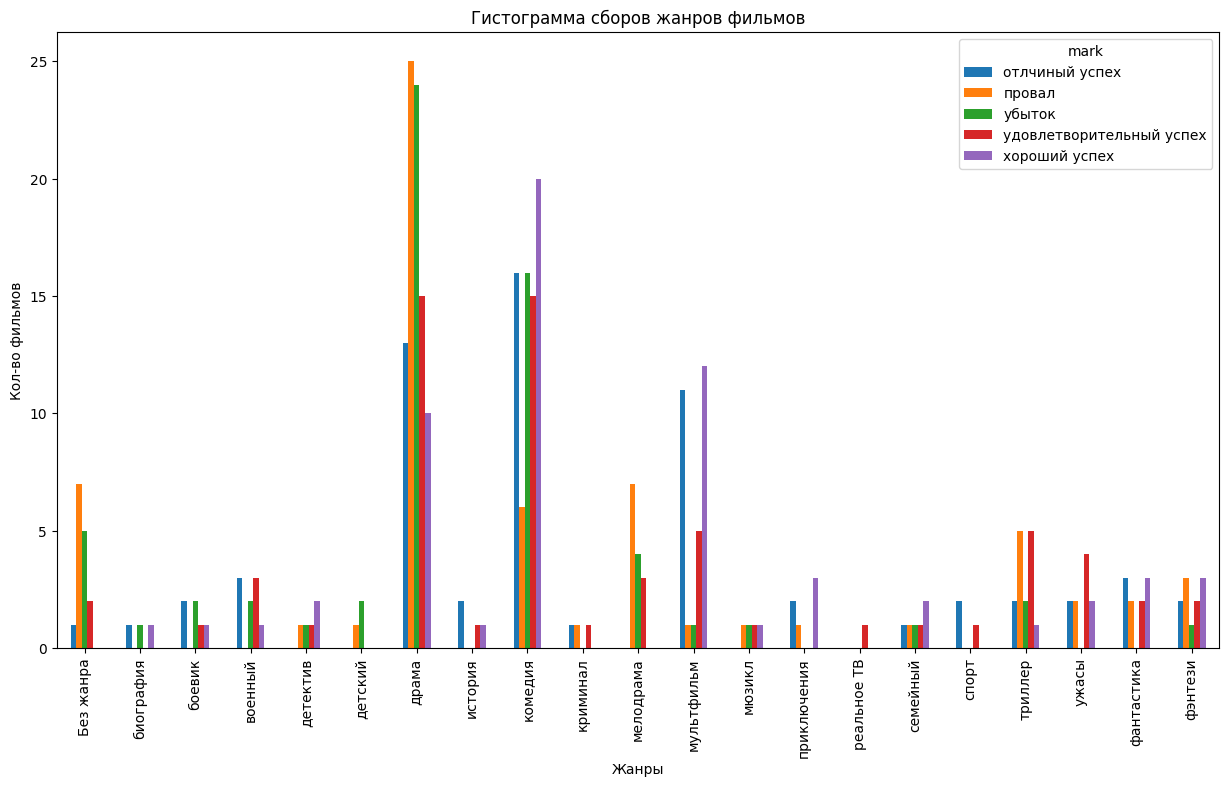

mark,main_genres,отлчиный успех,провал,убыток,удовлетворительный успех,хороший успех,доля успешных
0,Без жанра,1,7,5,2,0,0.20
1,биография,1,0,1,0,1,0.67
2,боевик,2,0,2,1,1,0.67
3,военный,3,0,2,3,1,0.78
4,детектив,0,1,1,1,2,0.60
5,детский,0,1,2,0,0,0.00
6,драма,13,25,24,15,10,0.44
7,история,2,0,0,1,1,1.00
8,комедия,16,6,16,15,20,0.70
9,криминал,1,1,0,1,0,0.67


In [54]:
janri=(svodnaya_gov_sup.groupby('main_genres')['mark'].value_counts().unstack(fill_value=0))

janri.plot(kind='bar',figsize=(15,8))
plt.xlabel('Жанры')
plt.ylabel('Кол-во фильмов')
plt.title('Гистограмма сборов жанров фильмов')
plt.show()

janri=janri.reset_index()

janri['доля успешных']=(janri.loc[:,['отлчиный успех','хороший успех','удовлетворительный успех']].sum(axis=1))/janri.loc[:,'отлчиный успех':'хороший успех'].sum(axis=1)
display(janri)


##### Видно, что Драма самый провальный жанр (при учете кол-ва фильмов) - 25 и 24 провальных и убыточных фильма соответственно (доля успешных 0.44). Самые успешный жанр (при учете кол-ва фильмов) - мультфильм (доля успешных 0.93).

##### Проверим как распределины оценки фильмов, получивших гос. поддержку, для этого проведем категоризацию по следующей логике:
* оценка фильма >= 7 -> оценка "хорошо"
* 7 > оценка фильма >= 5 -> оценка "средне"
* оценка фильма < 5 -> оценка "плохо"


In [55]:
average_genre_rait=(svodnaya_gov_sup.pivot_table(index='main_genres',values='ratings',aggfunc='median').sort_values(by='ratings',ascending=False))

def rating_marking(x):
    if x>=7:
        return 'хорошо'
    elif x>=5:
        return 'средне' 
    else:
        return 'плохо'

average_genre_rait['критерий']=average_genre_rait['ratings'].apply(lambda x: rating_marking(x))
display(average_genre_rait)
display(average_genre_rait['критерий'].value_counts())

,ratings,критерий
main_genres,,
криминал,7.80,хорошо
детский,7.30,хорошо
спорт,7.00,хорошо
биография,6.90,средне
детектив,6.80,средне
фэнтези,6.80,средне
мюзикл,6.60,средне
драма,6.50,средне
боевик,6.45,средне


критерий
средне    16
хорошо     3
плохо      2
Name: count, dtype: int64

##### Подавляющее число фильмов имеют оценку "средне" (доля таких фильмов 76.2%). При этом наивысший рейтинг имеют такие жанры как: криминал (7.80), детский (7.30) и спорт (7.00). Низший рейтинг имеют такие жанры ка%к приключения (5.40), ужасы (5.10) и семейный (4.80). 

##### Проведем анализ окупаемости каждого жанра:

In [56]:
money_genres=(svodnaya_gov_sup.pivot_table(index='main_genres',values=['budget','box_office','ratings'],aggfunc='mean'))
money_genres['Разница между сборами и бюджетом в %']=round((money_genres['box_office']-money_genres['budget'])/money_genres['budget']*100,2)
money_genres.columns=['сборы', 'бюджет', 'рейтинг', 'Разница между сборами и бюджетом в %']
display(money_genres.sort_values(by='Разница между сборами и бюджетом в %',ascending=False))

,сборы,бюджет,рейтинг,Разница между сборами и бюджетом в %
main_genres,,,,
спорт,989256129.15,236822988.33,6.93,317.72
комедия,170958595.26,84413668.18,5.53,102.52
Без жанра,98783248.31,75323614.88,0.00,31.15
ужасы,71012318.94,56387762.50,5.20,25.94
фантастика,171820427.94,167118421.87,5.25,2.81
биография,172294345.88,176311212.33,6.90,-2.28
семейный,97404124.94,100633297.83,4.98,-3.21
мультфильм,187400471.16,205387006.76,5.76,-8.76
драма,109090162.08,125074454.71,6.37,-12.78


##### Заметна отличная окупаемость таких жанров как спорт, коммедия и ужасы. Объяснить это можно низкими затрами на производство таких фильмов (не нужно дорогостоящих спец. эффектов, выстраивания сложных локаций и т.д.) и более широкой аудиторией (более вероятно что человек пойдет на комедию, нежели чем, например, на мюзикл). 

##### Чаще всего уходят в значительный минус такие жанры как: мюзикл, детектив, мелодрама и детский. Объяснить это можно высокой конкуренцией и затратами: 
* Мюзикл: Конкурирует с бродвейскими постановками, концертными записями и просто музыкальными клипами на YouTube.
* Детектив/Мелодрама: Их естественная «обитель» — телевидение и стриминги (сериалы, мини-сериалы).
* Детский: Жесткая конкуренция с мультфильмами (как полнометражными, так и сериалами), YouTube-каналами и видеоиграми.
* Детектив/Мелодрама могут быть и дешевыми в производстве, но тогда их вытесняют телевизионные аналоги (чтобы выделиться, нужны звезды и дорогая реклама, что съедает бюджет).


### Общий вывод
##### В ходе выполнения данной работы был проведён комплексный анализ данных, посвящённых развитию киноиндустрии в мире за период с 2010 по 2019 годы. Исследование началось с этапа предварительной обработки данных, который является критически важным для любого аналитического исследования. На этом этапе были устранены пропуски, исправлены ошибки и приведены к единому формату различные варианты записи данных. Стандартизация и очистка информации позволили значительно повысить качество дальнейшего анализа и снизить вероятность искажения результатов. Также были выделены наиболее значимые параметры, оказывающие ключевое влияние на финансовые и рейтинговые показатели фильмов.
##### Анализ динамики развития киноиндустрии показал, что в рассматриваемый период отрасль в целом демонстрировала рост. Увеличилось как количество фильмов, выходящих в прокат, так и совокупные затраты на их производство. Однако выявленный спад в 2017–2018 годах указывает на наличие структурных и экономических проблем внутри отрасли. К числу возможных причин данного спада можно отнести рост инфляции и, как следствие, удорожание билетов, изменения в законодательстве и налоговой системе, а также реформы в механизмах государственного финансирования кинопроектов. Несмотря на это, к 2019 году ключевые показатели отрасли в значительной степени восстановились.
##### Отдельное внимание в работе было уделено анализу возрастных категорий фильмов. Было установлено, что в течение нескольких лет подряд лидирующие позиции по кассовым сборам занимали фильмы с возрастным ограничением «16+». Однако начиная с 2017 года наблюдается постепенное снижение интереса аудитории к данной категории, что может быть связано с перенасыщением рынка и усилением конкуренции со стороны фильмов категории «12+». В 2019 году лидерство по сборам перешло к фильмам «6+», что указывает на рост интереса зрителей к семейному и детскому контенту.
##### Жанровый анализ показал, что высокая популярность и большие объёмы проката не всегда означают финансовую успешность. Значительная часть художественных фильмов, несмотря на лидерство по количеству показов, не смогла окупить свои бюджеты. Аналогичная ситуация наблюдается и среди анимационных фильмов. В то же время такие жанры, как спортивные, биографические фильмы, комедии, семейное кино, ужасы и фантастика, продемонстрировали более устойчивые и сбалансированные результаты. Особенно выделяются фильмы спортивной тематики, которые при относительно небольших затратах обеспечили значительную долю совокупных сборов, что говорит об их высокой инвестиционной привлекательности.
##### Сравнение фильмов, снятых при государственной поддержке, и коммерческих проектов позволило сделать ряд важных выводов. В целом медианные рейтинги государственных фильмов по большинству жанров оказались ниже, чем у коммерческих и зарубежных аналогов. Однако в отдельных жанрах — таких как боевики, детективы, детские и криминальные фильмы — проекты с господдержкой получили более высокие оценки зрителей. Особенно заметным является преимущество государственных детских фильмов, что, вероятно, связано с целенаправленной политикой государства по развитию детского и семейного кинематографа.
##### При этом анализ кассовых сборов показал, что фильмы, снятые в рамках государственных программ, в совокупности собирают больше средств, чем коммерческие проекты. Это может объясняться более крупными бюджетами, активным продвижением и доступом к более эффективным рекламным каналам. Тем не менее, выявлены жанры, в которых коммерческие фильмы, несмотря на более низкие рейтинги государственных аналогов, демонстрируют лучшие финансовые результаты, что указывает на сложную и неоднозначную взаимосвязь между качеством, зрительским восприятием и коммерческим успехом.
##### В целом результаты исследования позволяют сделать вывод о том, что российская киноиндустрия в рассматриваемый период развивалась неравномерно, испытывая как периоды роста, так и спада. При этом наблюдается постепенное улучшение качества отдельных жанров и формирование более устойчивых направлений, способных одновременно привлекать зрителей и обеспечивать финансовую эффективность. Полученные выводы могут быть использованы для дальнейшего анализа отрасли, а также при разработке стратегий финансирования и продвижения кинопроектов.